1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices , dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm

In [191]:
kidney=pd.read_csv("E:/OneDrive/桌面/kidney_disease.csv")
kidney=kidney.drop('id',axis=1)
kidney.describe()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [192]:
kidney.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

Based on this dataset, we can define a classification problem: predict whether a patient has chronic kidney disease (CKD). Using 24 variables to diagnose whether you have CKD can help you detect the risk of the disease earlier and continue treatment in a timely manner.

2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.

In [193]:
float_columns=kidney.select_dtypes(include=['float64']).columns
object_columns=kidney.select_dtypes(include=['object']).columns

In [194]:
mappings={
    'rbc':{'normal':1,'abnormal':0},
    'pc':{'normal':1,'abnormal':0},
    'pcc':{'present':1,'notpresent':0},
    'ba':{'present':1,'notpresent':0},
    'htn':{'yes':1,'no':0},
    'dm':{'yes':1,'no':0},
    'cad':{'yes':1,'no':0},
    'pe':{'yes':1,'no':0},
    'ane':{'yes':1,'no':0},
    'appet':{'good':1,'poor':0},


}

In [195]:
for column,mapping in mappings.items():
    kidney[column]=kidney[column].replace(mapping)

C:\Users\Leeeo\AppData\Local\Temp\ipykernel_47896\1876931874.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kidney[column]=kidney[column].replace(mapping)


In [196]:
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0,0,1.0,0.0,0.0,notckd
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0,0,1.0,0.0,0.0,notckd
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0,0,1.0,0.0,0.0,notckd
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0,0,1.0,0.0,0.0,notckd


In [197]:
scaler=StandardScaler()
kidney[float_columns]=scaler.fit_transform(kidney[float_columns])

3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [198]:
kidney.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,htn,appet,pe,ane
count,3.910000e+02,3.880000e+02,3.530000e+02,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,3.120000e+02,3.480000e+02,398.000000,399.000000,399.000000,399.000000
mean,9.994847e-17,-2.380684e-16,2.415443e-15,0.000000,0.000000,0.810484,0.773134,0.106061,0.055556,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,-7.970832e-17,4.083579e-17,0.369347,0.794486,0.190476,0.150376
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415,1.001428,0.392711,0.419431,0.308305,0.229351,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,1.001606e+00,1.001440e+00,0.483235,0.404584,0.393170,0.357888
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-0.752868,-0.410106,0.000000,0.000000,0.000000,0.000000,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,-6.671023e-01,-3.241109e+00,0.000000,0.000000,0.000000,0.000000
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-0.752868,-0.410106,1.000000,1.000000,0.000000,0.000000,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,-2.594231e-01,-7.655198e-01,0.000000,1.000000,0.000000,0.000000
50%,2.050779e-01,2.583733e-01,4.540705e-01,-0.752868,-0.410106,1.000000,1.000000,0.000000,0.000000,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,-7.126345e-02,4.248496e-02,0.000000,1.000000,0.000000,0.000000
75%,7.590867e-01,2.583733e-01,4.540705e-01,0.727772,-0.410106,1.000000,1.000000,0.000000,0.000000,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,8.553625e-02,8.504897e-01,1.000000,1.000000,0.000000,0.000000
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733,4.145186,1.000000,1.000000,1.000000,1.000000,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,1.328807e+01,1.813219e+00,1.000000,1.000000,1.000000,1.000000


The statistical summary of numerical features displays statistical information such as the median, mean, and standard deviation of each variable. For example, the mean age (age) is 51.56 years, and the mean blood pressure (bp) is 76.57 mm Hg.
The mean value of red blood cell count (rc) is 29.96 and the standard deviation is 9.52, which shows that the data distribution fluctuates greatly on this feature.

C:\Users\Leeeo\AppData\Local\Temp\ipykernel_47896\3028072117.py:16: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\Leeeo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


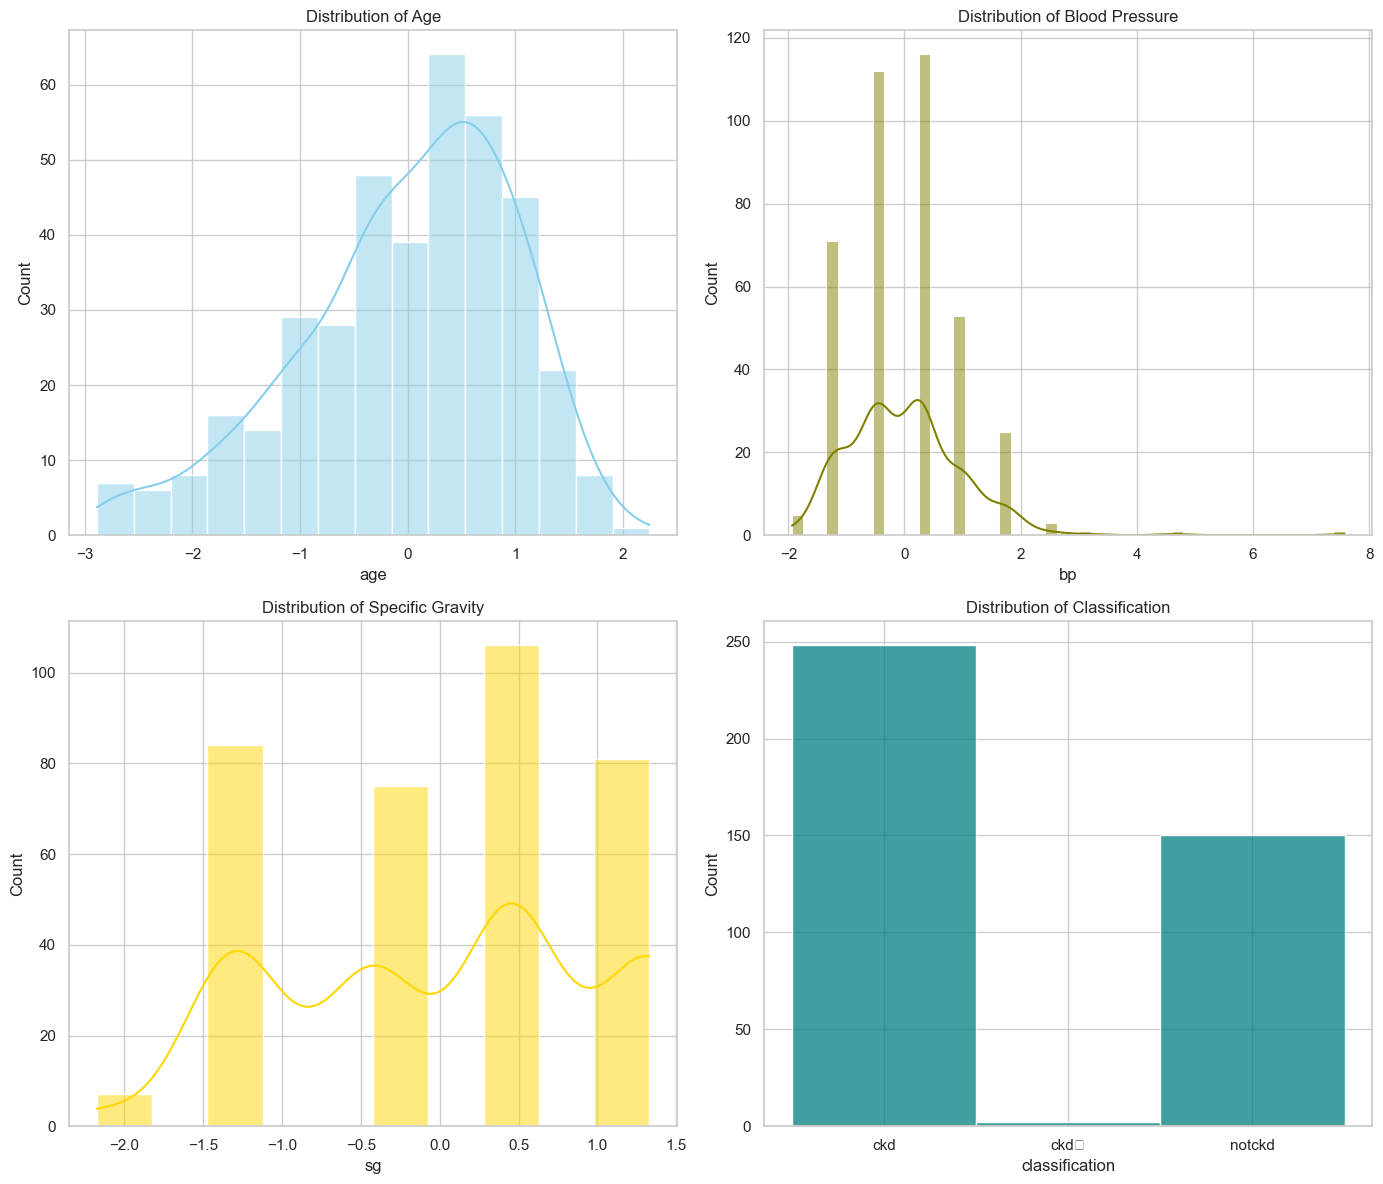

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the aesthetics for the plots
sns.set(style="whitegrid")
# Creating a figure to hold subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
# Plotting histograms for some key variables
sns.histplot(kidney['age'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Age')
sns.histplot(kidney['bp'], kde=True, ax=axes[0, 1], color='olive')
axes[0, 1].set_title('Distribution of Blood Pressure')
sns.histplot(kidney['sg'], kde=True, ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Distribution of Specific Gravity')
sns.histplot(kidney['classification'], bins=3, ax=axes[1, 1], color='teal')
axes[1, 1].set_title('Distribution of Classification')
plt.tight_layout()
plt.show()


Age distribution (Age): The age distribution is close to a normal distribution, concentrated between the ages of 40 and 70.

Blood pressure distribution: Blood pressure is mainly concentrated between 70 and 90 mm Hg, showing a slightly right-skewed distribution.

Specific Gravity: Specific gravity is mainly concentrated between 1.010 and 1.025, with most samples concentrated around 1.020.

Classification distribution (Classification): The target variable shows that most samples are classified as chronic kidney disease (CKD), and a small number of samples are not diseased (notckd), which indicates that there may be an imbalance problem in the samples.

4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

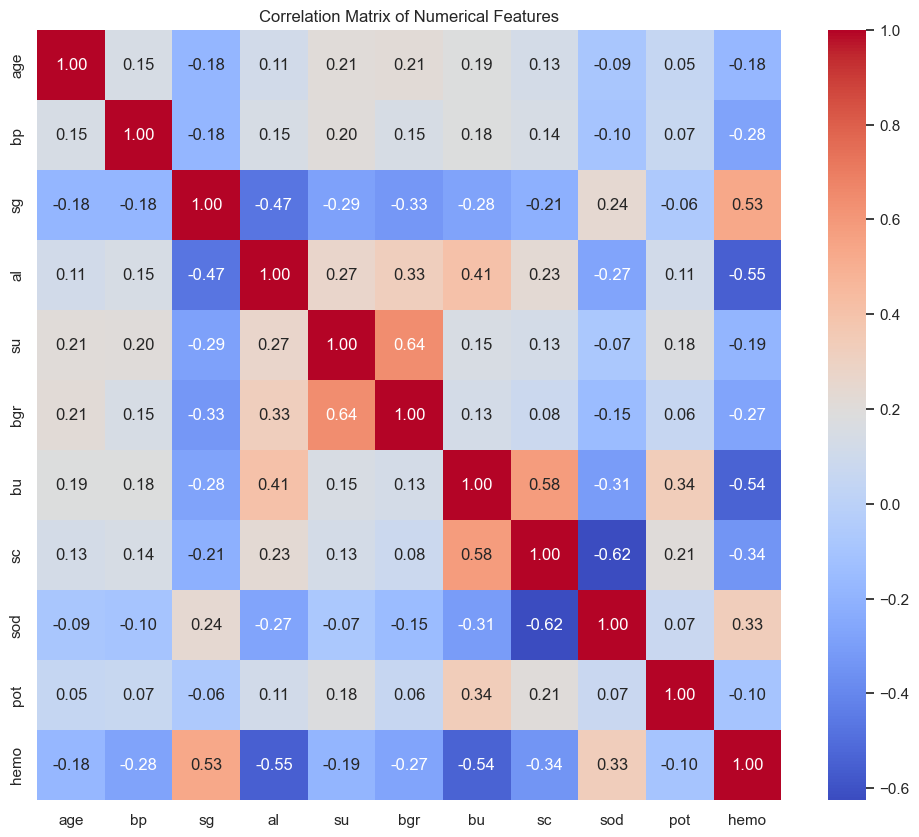

In [200]:
df_float=kidney[float_columns]
df_float=df_float.apply(lambda x:x.fillna(x.mean()),axis=0)
correlation_matrix =df_float.corr()
# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Strongly correlated variable pairs: Some variables show a high correlation between each other, such as pcv (red blood cell volume) and hemo (hemoglobin) which have a strong positive correlation (0.89). This suggests that these two features may carry similar information and may be redundant for model predictions.

Correlation with the target variable: Some features such as sg (specific gravity) and hemo (hemoglobin) show a strong negative correlation with the target variable classification. This means these variables may be particularly useful in predicting whether you have chronic kidney disease.

Low correlation features: Some features like wc (white blood cell count) have low correlation with most other features, which may indicate that they provide some independent information that is useful to the model.

5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [201]:
missing_value=kidney.isnull().sum()
kidney_cleaned=kidney.dropna()
kidney_num=kidney_cleaned[float_columns]

6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

In [202]:
from scipy import stats
z_scores=np.abs(stats.zscore(kidney_num))
outliers=np.where(z_scores>3)
remove_outliers=kidney_cleaned[(z_scores<3).all(axis=1)]

7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

In [203]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
# Preparing data for clustering (excluding the classification label)
x=kidney_cleaned.drop('classification',axis=1)

In [204]:
from sklearn.cluster import KMeans
pca_x=PCA()
pca_loading=pd.DataFrame(pca_x.fit(x).components_.T,index=x.columns)
pc_scores=pd.DataFrame(pca_x.fit_transform(x),index=x.index)
# Applying K-means clustering with 3 clusters
km=KMeans(n_clusters=3,n_init=20,random_state=0)
km.fit(x)
km.labels_


array([1, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 0,
       2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1])

In [205]:
pd.Series(km.labels_).value_counts()

1    89
0    59
2    10
Name: count, dtype: int64

<Figure size 1000x800 with 0 Axes>

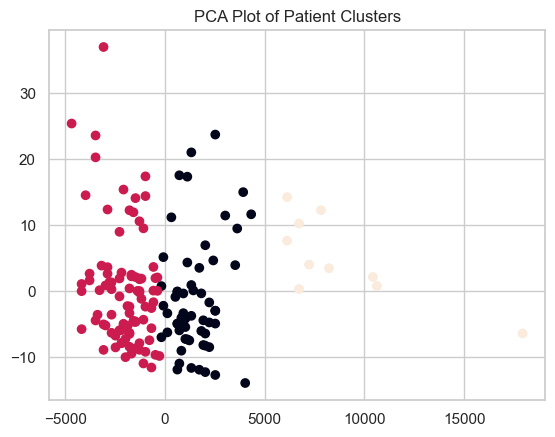

<Figure size 1000x800 with 0 Axes>

In [206]:
plt.scatter(pc_scores[0],pc_scores[1],c=km.labels_)
plt.title('PCA Plot of Patient Clusters')
plt.figure(figsize=(10, 8))

Through the scatter plot display after dimensionality reduction by principal component analysis (PCA), we can see three obvious patient groups. These groups are well differentiated in the distribution of the two principal components.

8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    kidney_cleaned.drop('classification',axis=1),
    kidney_cleaned['classification'],
    test_size=0.3,
    random_state=1
)

9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.

(a)Random Forest:Random forest improves the stability and accuracy of the model by building multiple decision trees and taking the average or majority vote of their predictions. This method can effectively handle non-linear relationships between features and is especially suitable for complex medical data.

(b)Support Vector Machine, SVM：SVM performs well on many classification problems, especially when the feature dimension is high and it can still maintain good performance. By choosing different kernel functions, SVM can adapt to linear or nonlinear patterns in the data.


10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.

(a)Accuracy

Accuracy= TP+TN+FP+FN/TP+TN

​TP (True Positives): The number of correctly predicted positive examples.

TN (True Negatives): The number of correctly predicted negative examples.

FP (False Positives): The number of incorrectly predicted positive examples.

FN (False Negatives): The number of falsely predicted negative examples.

Accuracy provides an intuitive measure of how well the model performs overall on the entire data set. It calculates the ratio of all correct predictions (positive and negative) to the total number of predictions and is the most direct performance measure.

(b)F1 score

F1 Score=2× (Precision+Recall/Precision×Recall)

Precision= (TP+FP)/TP

Precision: The proportion of all samples predicted to be positive that are actually positive.

Recall= (TP+FN)/TP

​Recall: The proportion of all samples that are actually positive examples that are correctly predicted as positive examples.

The F1 score is the harmonic average of precision and recall, which can take into account both the model's ability to identify minority classes (recall) and the accuracy of prediction (precision). When processing medical data or other applications that value minority class performance, the F1 score provides a more comprehensive measure of performance. For example, in kidney disease prediction, the cost of a missed diagnosis may be much higher than the cost of a misdiagnosis.

11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

In [208]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [209]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
importances = rf.feature_importances_


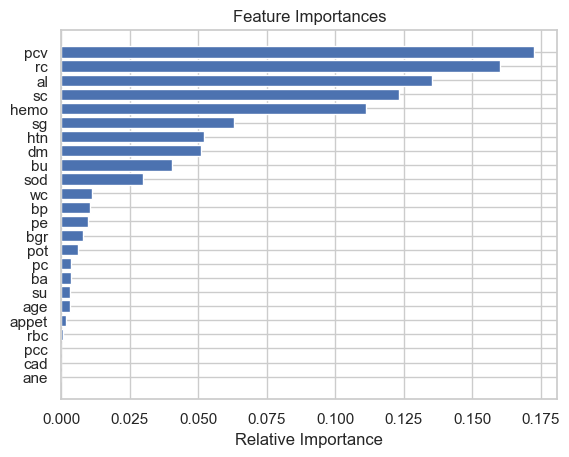

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
features = X_train.columns
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
# Performance metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='macro')
rf_f1

0.9729577464788732

In [212]:
# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
# Performance metrics
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='macro')
svm_f1

0.5654320987654321

The F1 score of Random Forest (0.973) is much higher than that of SVM (0.565):
This shows that the random forest model performs better in both precision and recall when processing the data set. Random forest can balance these two indicators more effectively, especially when predicting minority classes, it may be more accurate and comprehensive.

The F1 score of SVM is relatively low:
This may imply that the SVM model has some problems on the data set, such as sensitivity to class imbalance, improper selection of kernel functions, or failure to optimize parameter settings.

13. **Interpretable Classifier Insight**: After re-training the interpretable classifier with allavailable data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

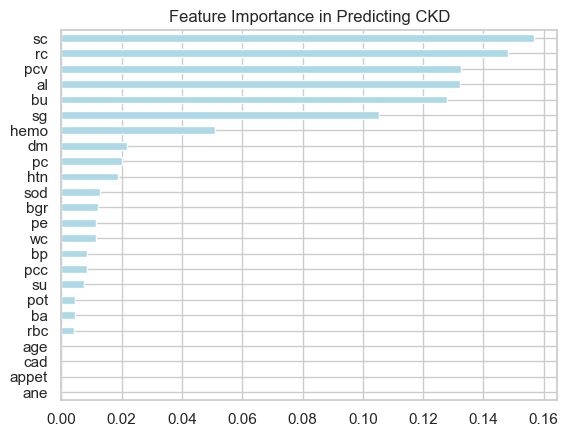

In [213]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_test, y_test)
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=x.columns)
sorted_importance = feature_importance.sort_values()
sorted_importance.plot(kind='barh', color='lightblue')
plt.title('Feature Importance in Predicting CKD')
plt.show()


The most important features:

Serum creatinine (sc)  appear to be the  most important features in predicting chronic kidney disease (CKD). This may indicate that measures of kidney function (especially creatinine levels, which are commonly used to assess kidney function) and the number of red blood cells are closely related to kidney health.

Secondary features:

The next set of features, including hemoglobin (hemo), urea (bu), specific gravity (sg), albumin (al), and corpuscular volume (pcv), also showed relatively high importance. These characteristics are closely related to biomarkers and pathological processes of CKD.

Low importance features:

Features at the bottom of the chart, such as age, red blood cells (rbc), and appetite (appet), are relatively less important in predicting CKD. This may suggest that, although these factors may have their clinical importance, they play less of a direct role in model predictions compared to the physiological and laboratory tests mentioned above.

15. **Team Contributions:** Document each team member's specific contributions related to the questions above.

Liu, Zheng, liuz313:Q1--Q6

Qu, Wen, quw6: Q7--Q10

Yang, Qinuo, yangq75: Q11--Q13

Code analysis:Liu, Zheng  &  Qu, Wen
Statement analysis: Yang, Qinuo

16. **Link** to the public GitHub repository.